## Study Summary

1. 導入pandas, 利用pandas的數據繪製關係圖
2. 自行輸入經緯度, 繪製所在區域的地圖
3. 學習如何讀取氣象資訊檔:netCDF4

In [2]:
# install氣象資訊檔, 提供解讀檔案資訊
!pip install netCDF4

     ---------------------------------------- 6.6/6.6 MB 768.4 kB/s eta 0:00:00
     ------------------------------------ 171.0/171.0 kB 734.1 kB/s eta 0:00:00


### 1. 導入pandas, 利用pandas的數據繪製關係圖
     目標: 將csv人口數加到指定的地圖中

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
# import dataset
posi = pd.read_csv("2014_us_cities.csv")

posi.info()
posi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3228 non-null   object 
 1   pop     3228 non-null   int64  
 2   lat     3228 non-null   float64
 3   lon     3228 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 101.0+ KB


,name,pop,lat,lon
0,New York,8287238,40.730599,-73.986581
1,Los Angeles,3826423,34.053717,-118.242727
2,Chicago,2705627,41.875555,-87.624421
3,Houston,2129784,29.758938,-95.367697
4,Philadelphia,1539313,39.952335,-75.163789


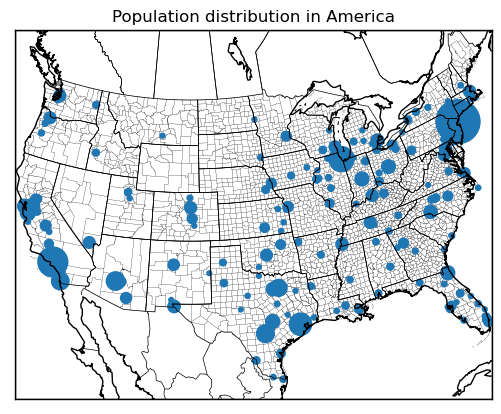

In [9]:
#原始資料有3228組資料，選擇其中的280個城市的資料
lat = np.array(posi["lat"][0:280]) # 獲取維度之維度值
lon = np.array(posi["lon"][0:280]) # 獲取經度值
pop = np.array(posi["pop"][0:280],dtype=float) # 獲取人口數，轉化為numpy浮點型

#resolution: 邊界: c（粗）、l（低）、i（中）、h（高）、f（全）或無
#area_thresh: 面積小於 area_thresh (km^2) 的海岸線或湖泊將不會被繪製。 Default 10000,1000,100,10,1 for resolution c, l, i, h, f.
map = Basemap(projection='stere', lat_0=90, lon_0=-105, #lat_0:中心緯度（y 軸原點）; lon_0: 中心經度（x 軸原點）
            llcrnrlat=23.41, urcrnrlat=45.44,    #所選地圖左下角的緯度; 所選地圖右上角的緯度
            llcrnrlon=-118.67, urcrnrlon=-64.52, #所選地圖左下角的經度; 所選地圖右上角的經度
            rsphere=6371200., resolution='l', area_thresh=10000)

map.drawmapboundary()   # 繪製邊界
map.drawstates()        # 繪製州
map.drawcoastlines()    # 繪製海岸線
map.drawcountries()     # 繪製國家
map.drawcounties()      # 繪製縣

# 繪製散點圖時圖形的大小，如果之前pop不轉換為浮點型會沒有大小不一的效果
size=(pop/np.max(pop))*1000 

x,y = map(lon,lat)

map.scatter(x,y,s=size)

plt.title('Population distribution in America')
plt.show()

結論: 紐約、舊金山、芝加哥、華盛頓是美國人口數量最多的城市

## 2. 自行輸入經緯度, 繪製所在區域的地圖
    目標：鍵盤輸入一個經度，程式就要幫我們畫出以該經度為中心的地球投影圖。

In [15]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [16]:
# 手動輸入(指定)lon_0: 中心經度（x 軸原點）
lon_0 = float(input('enter reference longitude (lon_0):'))

enter reference longitude (lon_0):70


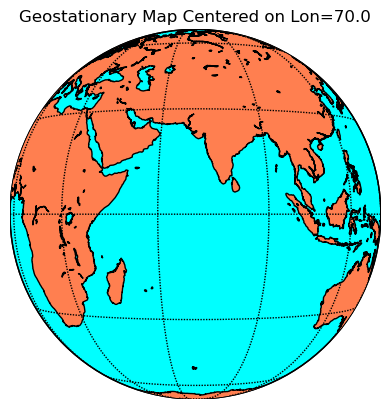

In [19]:
# 把剛剛的 lon_0 代入並畫圖
map = Basemap(projection='geos', lon_0=lon_0, rsphere=(6378137.00,6356752.3142), resolution='l')
map.drawcoastlines()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

plt.title('Geostationary Map Centered on Lon=%s' % (lon_0))
plt.show()

## 3. 學習如何讀取氣象資訊檔:netCDF4

In [20]:
!pip install netCDF4

In [67]:
!pip install cartopy

  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached shapely-2.0.1-cp39-cp39-win_amd64.whl (1.4 MB)
Failed to build cartopy


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [279 lines of output]
  <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\_version.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\__init__.py -> build\lib.win-amd64-cpython-39\cartopy
  creating b

In [66]:
# 導入資料庫與套件
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ModuleNotFoundError: No module named 'cartopy'

In [30]:
data = Dataset('MERRA2_400.tavgM_2d_slv_Nx.202001.nc4', mode='r')

In [31]:
data.variables.keys()

dict_keys(['lon', 'lat', 'time', 'CLDPRS', 'CLDTMP', 'DISPH', 'H1000', 'H250', 'H500', 'H850', 'OMEGA500', 'PBLTOP', 'PS', 'Q250', 'Q500', 'Q850', 'QV10M', 'QV2M', 'SLP', 'T10M', 'T250', 'T2M', 'T2MDEW', 'T2MWET', 'T500', 'T850', 'TO3', 'TOX', 'TQI', 'TQL', 'TQV', 'TROPPB', 'TROPPT', 'TROPPV', 'TROPQ', 'TROPT', 'TS', 'U10M', 'U250', 'U2M', 'U500', 'U50M', 'U850', 'V10M', 'V250', 'V2M', 'V500', 'V50M', 'V850', 'ZLCL', 'Var_CLDPRS', 'Var_CLDTMP', 'Var_DISPH', 'Var_H1000', 'Var_H250', 'Var_H500', 'Var_H850', 'Var_OMEGA500', 'Var_PBLTOP', 'Var_PS', 'Var_Q250', 'Var_Q500', 'Var_Q850', 'Var_QV10M', 'Var_QV2M', 'Var_SLP', 'Var_T10M', 'Var_T250', 'Var_T2M', 'Var_T2MDEW', 'Var_T2MWET', 'Var_T500', 'Var_T850', 'Var_TO3', 'Var_TOX', 'Var_TQI', 'Var_TQL', 'Var_TQV', 'Var_TROPPB', 'Var_TROPPT', 'Var_TROPPV', 'Var_TROPQ', 'Var_TROPT', 'Var_TS', 'Var_U10M', 'Var_U250', 'Var_U2M', 'Var_U500', 'Var_U50M', 'Var_U850', 'Var_V10M', 'Var_V250', 'Var_V2M', 'Var_V500', 'Var_V50M', 'Var_V850', 'Var_ZLCL'])

In [36]:
# 設定經緯度，並讀入 T2M (兩公尺的溫度變數)
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
T2M = data.variables['T2M'][:,:,:]

In [37]:
# 若在文件中使用多個時間索引的 MERRA-2 數據，以下將提取第一個時間索引。
T2M = T2M[0,:,:]

In [41]:
# 設置圖形大小，投影和範圍
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())   # 在羅賓森投影上使用繪圖函數
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)   # 解析度為粗糙
ax.gridlines(linestyle='--',color='black')

# 設置輪廓線級別，接著繪製圖和顏色欄
clevs = np.arange(230,311,5)
plt.contourf(lon, lat, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Air Temperature at 2m, Jan 2023', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

NameError: name 'ccrs' is not defined

<Figure size 800x400 with 0 Axes>

In [ ]:
# 儲存圖片
fig.savefig('MERRA2_t2m.png', format='png', dpi=360)   # dpi 為輸出之解析度設定

## Homework

1. 讀入 etopo5 地形/降水量資料集: "etopo5.cdf". 繪製分布圖
2. 延續使用者資料的導入使用, 除了, "文字檔", "網路資訊", 還有圖像檔;
   所以嘗試使用一張"earth_lights_lrg.jpg" 搭配不同的投影方式繪製地圖

1. 讀入 etopo5 地形/降水量資料集: "etopo5.cdf". 繪製分布圖

In [61]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

dict_keys(['ETOPO05_X', 'ETOPO05_Y', 'ROSE'])


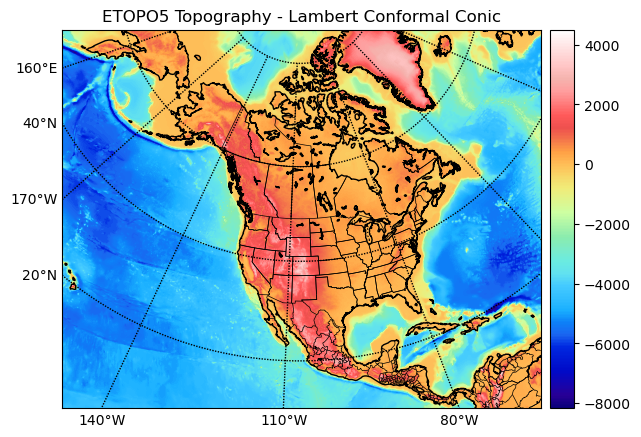

In [68]:
# 讀入 etopo5 地形/降水量。.
# url = 'https://github.com/NOAA-PMEL/FerretDatasets/blob/master/data/etopo5.cdf'
# 要確認資料集所在路徑
etopodata = Dataset('etopo5.cdf')
# 取得資料集裡的資料定義
print(etopodata.variables.keys())

# 匯入資料
topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
# 移位資料, 使 lon 從 - 180 到 180, 而不是 20 到 380 
topoin,lons = shiftgrid(180.,topoin,lons,start=False)

# 繪製地形/降水量

# 創建圖形和軸實例
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
#設定地理資訊圖('lcc' = lambert conformal conic).
# 使用 Wgs84 橢圓體的主要和次要球體半徑, 做基礎的底圖
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)

# 轉換為分五千個單位格子的網格地理資訊圖
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat,cm.GMT_haxby)
#劃定海岸線和邊境界限。
m.drawcoastlines()
m.drawcountries()
m.drawstates()
# 繪製經緯線
# 設定地圖左側和底部的標籤
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])

# 加入 colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()

2. 延續使用者資料的導入使用, 除了, "文字檔", "網路資訊", 還有圖像檔;

所以嘗試使用一張"earth_lights_lrg.jpg" 搭配不同的投影方式繪製地圖

In [69]:
from __future__ import (absolute_import, division, print_function)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


warp to orthographic map ...


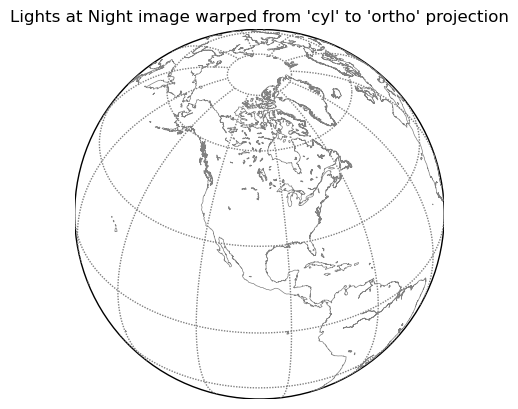

In [70]:
# 說明使用warpimage method 方法顯示圖像背景。
# 在地圖投影區域。 預設背景是『藍色。
#來自美國宇航局的大理石圖像 (http://visibleearth.nasa.gov)

# 建立新圖像
fig=plt.figure()
# 定義以北美為中心的正交投影.
m = Basemap(projection='ortho',lat_0=40,lon_0=-100,resolution='l')
# 顯示非預設影像 - 匯入要使用的IMAGE
m.warpimage(image='earth_lights_lrg.jpg')
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 每 30 度繪製一組 lat/lon 網格線。
m.drawmeridians(np.arange(0,360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')
#添加圖示標題
plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)
print('warp to orthographic map ...')

plot native cylindrical map (no warping needed) ...


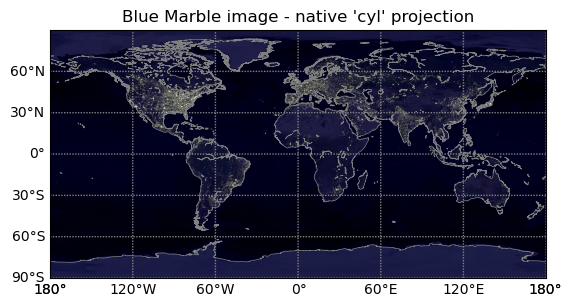

In [71]:
# 建立新圖像
fig=plt.figure()
#新定義圓柱形等距投影。
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='l')
# 繪圖 (未扭曲) rgba 圖像
im = m.bluemarble(scale=0.5)
m.warpimage(image='earth_lights_lrg.jpg')
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 繪製經緯度網格
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='0.5')
# 輸出圖像標題
plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()